In [2]:
%%time
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd


sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


CPU times: user 3.36 s, sys: 881 ms, total: 4.24 s
Wall time: 18.9 s


In [1]:
%%time
##BASELINE RUN
## 1.25 million, E-I = 0.7, I-R = 0.3, IS-IE = 0.5, IC = 50

start = time.time()
s = 1250000
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)

time1= time.time()
print("Data creation: ",time1-start)

r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)

time2 = time.time()
print("Fuzzy simplicial:",time2-time1,"   ||| From start: ",time2-start)

#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)

time3 = time.time()
print("Graph formation:",time3-time2,"   ||| From start: ",time3-start)
#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

H1 = nx.DiGraph()
H1.add_node('S')
H1.add_edge('E', 'I', rate = 0.7)
H1.add_edge('I', 'R', rate = 0.3)

J1 = nx.DiGraph()
J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
IC = defaultdict(lambda: 'S')
for node in range(50):
    IC[node] = 'I'
    
return_statuses = ('S', 'E', 'I', 'R')

t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

plt.semilogy(t, S, label = 'Susceptible')
plt.semilogy(t, E, label = 'Exposed')
plt.semilogy(t, I, label = 'Infected')
plt.semilogy(t, R, label = 'Recovered')
plt.legend()

plt.savefig('results/SEIR_1.25M_baseline.png')
time4 = time.time()
print("SEIR:",time4-time3,"   ||| Total: ",time4-start)



NameError: name 'time' is not defined

Data creation:  0.6287822723388672
Fuzzy simplicial: 335.7327733039856    ||| From start:  336.36155557632446
Graph formation: 348.1930515766144    ||| From start:  684.5546071529388


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


SEIR: 1140.6901438236237    ||| Total:  1825.2447509765625
CPU times: user 29min 48s, sys: 1min 3s, total: 30min 52s
Wall time: 30min 25s


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


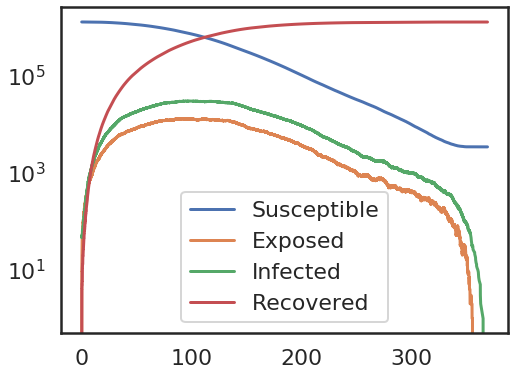

In [2]:
%%time
##TRANSMISSION RATE LOCKDOWN RUN
## 1.25 million, E-I = 0.7, I-R = 0.3, IS-IE = 0.3 (lockdown), IC = 50

start = time.time()
s = 1250000
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)

time1= time.time()
print("Data creation: ",time1-start)

r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)

time2 = time.time()
print("Fuzzy simplicial:",time2-time1,"   ||| From start: ",time2-start)

#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)

time3 = time.time()
print("Graph formation:",time3-time2,"   ||| From start: ",time3-start)
#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

H1 = nx.DiGraph()
H1.add_node('S')
H1.add_edge('E', 'I', rate = 0.7)
H1.add_edge('I', 'R', rate = 0.3)

J1 = nx.DiGraph()
J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.3, weight_label='weight')
IC = defaultdict(lambda: 'S')
for node in range(50):
    IC[node] = 'I'
    
return_statuses = ('S', 'E', 'I', 'R')

t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

plt.semilogy(t, S, label = 'Susceptible')
plt.semilogy(t, E, label = 'Exposed')
plt.semilogy(t, I, label = 'Infected')
plt.semilogy(t, R, label = 'Recovered')
plt.legend()

plt.savefig('results/SEIR_1.25M_tr30%.png')
time4 = time.time()
print("SEIR:",time4-time3,"   ||| Total: ",time4-start)

In [ ]:
%%time
##SUPER-SPREADER REMOVAL 5%
## 1.25 million, E-I = 0.7, I-R = 0.3, IS-IE = 0.5, IC = 50

start = time.time()
s = 1250000
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)

time1= time.time()
print("Data creation: ",time1-start)

r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)

time2 = time.time()
print("Fuzzy simplicial:",time2-time1,"   ||| From start: ",time2-start)

#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G = nx.from_scipy_sparse_matrix(sparse_matrix)

time3 = time.time()
print("Graph formation:",time3-time2,"   ||| From start: ",time3-start)

#########################################################################
print(f'number of edges BEFORE reducing superspreader connections: {G.number_of_edges()}') 
ss = sorted(G.degree, key=lambda x: x[1], reverse=True)
k1=round(5/100 * len(ss))  ## top 5 percent of highest degree nodes
ss1= [i[0] for i in ss]
ss_final = ss1[:k1]

for i in ss_final:
    k2=round(80/100 * len(G.edges(i)))  ## removing random 80% edges/connections of each selected superspreader
    list1 = list(G.edges(i))
    to_remove=random.sample(list1,k2)
    G.remove_edges_from(to_remove)
    
time4 = time.time()
print(f'number of edges AFTER reducing superspreader connections: {G.number_of_edges()}') 
print("reducing superspreader connections (80%):",time4-time3,"   ||| From start: ",time4-start)
#########################################################################

#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

H1 = nx.DiGraph()
H1.add_node('S')
H1.add_edge('E', 'I', rate = 0.7)
H1.add_edge('I', 'R', rate = 0.3)

J1 = nx.DiGraph()
J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
IC = defaultdict(lambda: 'S')
for node in range(50):
    IC[node] = 'I'
    
return_statuses = ('S', 'E', 'I', 'R')

t, S, E, I, R = EoN.Gillespie_simple_contagion(G, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

plt.semilogy(t, S, label = 'Susceptible')
plt.semilogy(t, E, label = 'Exposed')
plt.semilogy(t, I, label = 'Infected')
plt.semilogy(t, R, label = 'Recovered')
plt.legend()

plt.savefig('ss_5per.png')
time5 = time.time()
print("SEIR:",time5-time4,"   ||| Total: ",time5-start)